<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/3_Skills_Trend.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

#### Original Exploration
[12_Exercise_Trending_Skills.ipynb](../2_Advanced/12_Exercise_Trending_Skills.ipynb)

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
!pip install --upgrade datasets fsspec
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

## Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is Germany. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [2]:
## Skill count per month for data analysts
df_DA_Germany = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

df_DA_Germany['job_posted_month_no'] = df_DA_Germany['job_posted_date'].dt.month

# Explode job_skills column
df_DA_Germany_explode = df_DA_Germany.explode('job_skills')

### Pivot in Prep for Plotting

Create a pivot table from the `df_DA_Germany_explode`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [3]:
# Group by month and job_skills
df_DA_Germany_pivot = df_DA_Germany_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_Germany_pivot

job_skills,airflow,alteryx,angular,ansible,assembly,atlassian,aurora,aws,azure,bash,...,typescript,unity,unix,vb.net,vba,visio,visual basic,webex,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,0,4,0,1,4,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,0,0,2,0,0,5,0,...,0,0,1,0,3,0,0,0,2,2
3,2,0,0,0,0,0,0,2,6,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,1,1,3,0,...,1,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,1,1,3,0,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,1,0,1,3,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,2,0,0,0,3
8,0,0,0,0,0,0,0,2,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,4,0,0,0,0,0,1,4,0,...,0,0,0,1,2,0,0,0,0,1


#### Sort columns by count and change month numbers to names

It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [4]:
# sorts by count
df_DA_Germany_pivot.loc['Total'] = df_DA_Germany_pivot.sum()
df_DA_Germany_pivot = df_DA_Germany_pivot[df_DA_Germany_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_Germany_pivot = df_DA_Germany_pivot.drop('Total')

df_DA_Germany_pivot

job_skills,sql,python,tableau,r,power bi,excel,looker,qlik,sap,go,...,microstrategy,nltk,powershell,seaborn,symphony,tidyr,unity,vb.net,webex,visual basic
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,23,18,15,8,6,6,3,2,0,4,...,0,0,0,0,1,0,0,0,1,1
2,21,19,13,4,10,11,5,4,1,5,...,0,0,0,0,0,0,0,0,0,0
3,27,20,11,10,16,14,0,2,2,2,...,1,0,0,0,0,0,0,0,0,0
4,25,28,7,16,8,5,4,2,3,5,...,0,0,0,0,0,0,0,0,0,0
5,23,21,13,11,7,8,4,2,2,2,...,0,0,0,0,0,0,0,0,0,0
6,17,15,6,6,4,1,2,3,0,5,...,0,0,0,0,0,1,0,0,0,0
7,18,15,7,6,5,7,2,3,1,3,...,0,0,0,0,0,0,0,0,0,0
8,11,9,5,4,4,2,2,4,2,3,...,0,0,0,0,0,0,0,0,0,0
9,36,23,18,11,18,12,3,4,5,3,...,0,0,0,0,0,0,0,1,0,0


## Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them.

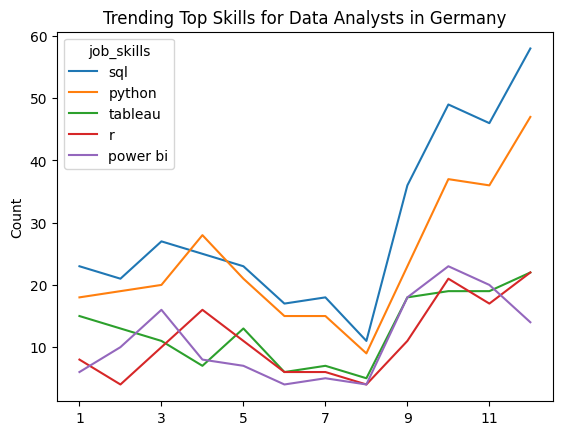

In [5]:
df_DA_Germany_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages clarify relationships within the whole, giving a more accurate comparison.

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in `df_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `DA_totals`. This is needed to compute the percentages.

In [6]:
# Get monthly totals
DA_totals = df_DA_Germany.groupby('job_posted_month_no').size()

DA_totals

,0
job_posted_month_no,
1,32
2,39
3,44
4,47
5,38
6,24
7,28
8,19
9,99


This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `df_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `DA_totals` and multiplying by 100. The new DataFrame, `df_DA_pivot_percent`, shows skill distributions as percentages of total monthly job entries.

In [7]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_Germany_percent = df_DA_Germany_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_Germany_percent = df_DA_Germany_percent.reset_index()
df_DA_Germany_percent['job_posted_month'] = df_DA_Germany_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_Germany_percent = df_DA_Germany_percent.set_index('job_posted_month')
df_DA_Germany_percent = df_DA_Germany_percent.drop(columns='job_posted_month_no')

df_DA_Germany_percent

job_skills,sql,python,tableau,r,power bi,excel,looker,qlik,sap,go,...,microstrategy,nltk,powershell,seaborn,symphony,tidyr,unity,vb.net,webex,visual basic
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,71.875000,56.250000,46.875000,25.000000,18.750000,18.750000,9.375000,6.250000,0.000000,12.500000,...,0.000000,0.000000,0.000000,0.000000,3.125,0.000000,0.000000,0.000000,3.125,3.125
Feb,53.846154,48.717949,33.333333,10.256410,25.641026,28.205128,12.820513,10.256410,2.564103,12.820513,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Mar,61.363636,45.454545,25.000000,22.727273,36.363636,31.818182,0.000000,4.545455,4.545455,4.545455,...,2.272727,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Apr,53.191489,59.574468,14.893617,34.042553,17.021277,10.638298,8.510638,4.255319,6.382979,10.638298,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
May,60.526316,55.263158,34.210526,28.947368,18.421053,21.052632,10.526316,5.263158,5.263158,5.263158,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Jun,70.833333,62.500000,25.000000,25.000000,16.666667,4.166667,8.333333,12.500000,0.000000,20.833333,...,0.000000,0.000000,0.000000,0.000000,0.000,4.166667,0.000000,0.000000,0.000,0.000
Jul,64.285714,53.571429,25.000000,21.428571,17.857143,25.000000,7.142857,10.714286,3.571429,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Aug,57.894737,47.368421,26.315789,21.052632,21.052632,10.526316,10.526316,21.052632,10.526316,15.789474,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000
Sep,36.363636,23.232323,18.181818,11.111111,18.181818,12.121212,3.030303,4.040404,5.050505,3.030303,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,1.010101,0.000,0.000


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `df_DA_pivot_percent` DataFrame. Also the legend is moved outside of the plot for readability.

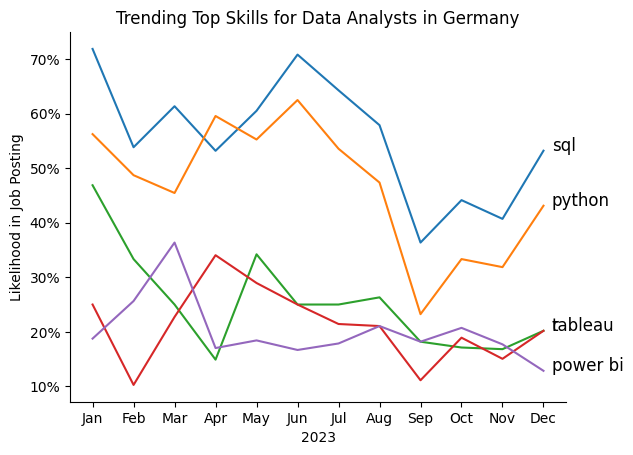

In [8]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_Germany_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()